In [1]:
from random import choices, choice, randint, randrange, random
from math import log10
import os
import time
import pygad
import numpy as np

In [2]:
def parse_input(filename):
    with open(filename, "r") as f:
        data = f.read()
    data = [i for i in data.split("\n") if i.strip() != ""]
    
    data = data[1:]
    client_data = [[data[i], data[i+1]] for i in range(0, len(data), 2)]
    
    for i in range(len(client_data)):
        likes, dislikes = client_data[i]
        likes = set(likes.split(" ")[1:])
        dislikes = set(dislikes.split(" ")[1:] or [])
        client_data[i] = [likes, dislikes]
    return client_data

In [3]:
def score_pizza(pizza_ingredients: set[str]):
    pizza_ingredients = set(pizza_ingredients)
    score = 0
    global client_data
    for client_info in client_data:
        client_likes, client_dislikes = client_info
        client_likes_pizza = True
        
        # all the ingredients they like are on the pizza
        for liked_ingredient in client_likes:
            if liked_ingredient not in pizza_ingredients:
                client_likes_pizza = False
                break

        # none of the ingredients they dislike are on the pizza 
        if client_likes_pizza:
            for disliked_ingredient in client_dislikes:
                if disliked_ingredient in pizza_ingredients:
                    client_likes_pizza = False
                    break
        if client_likes_pizza:
            score += 1
    return score

In [4]:
def getAllIngredients():
    global client_data
    allIngredients = set()
    for client_info in client_data:
        client_likes, client_dislikes = client_info
        allIngredients = allIngredients.union(client_likes)
        allIngredients = allIngredients.union(client_dislikes)
    return sorted(list(allIngredients))

In [5]:
def getAllDislikedIngredients():
    global client_data
    result = set() 
    for client_info in client_data:
        client_likes, client_dislikes = client_info
        result = result.union(client_dislikes)
    return result

In [6]:
def getIngredientsThatWereNeverDisliked():
    global client_data
    allIngredients = set(getAllIngredients(client_data))
    allDislikes = getAllDislikedIngredients(client_data)
    
    result = set()
    for i in allIngredients:
        if i not in allDislikes:
            result.add(i)
    
    return result

In [10]:
def generate_genome():
    'Generates random genome'
    global genomeLength
    return np.random.choice([0, 1], size=genomeLength)

def generate_population(size):
    'Generates list of random genomes of provided size'
    return np.array([generate_genome() for _ in range(size)])

def genome_to_ingredients(genome):
    'Convert genome to what pizza ingredients they represent'
    ingredients = set()
    for idx, bit in enumerate(genome):
        if bit == 1:
            ingredients.add(allIngredients[idx])
    return ingredients

def get_genome_score(genome, pop_idx):
    'Get score of genome i.e. how many clients were fine with the pizza'
    ingredients = genome_to_ingredients(genome)
    return score_pizza(ingredients)

In [31]:
files = ['./input/' + file for file in os.listdir('./input')]
input_file = files[3]
client_data = parse_input(input_file)
allIngredients = list(getAllIngredients())
bestGenome = None
bestScore = 0
genomeLength = len(allIngredients)

print(f"File selected: {input_file}")
print(f"No. of ingredients: {len(allIngredients)}")
print(f"No. of clients: {len(client_data)}")
print(f"No. of permutations possible: 2^{len(allIngredients)} or 10^{round(log10(2)*len(allIngredients), 2)}")
print(f"Max Score Limit: {len(client_data)}")
print(time.strftime("Time started: %H:%M"))

ga_instance = pygad.GA(
    num_generations=1_000,
    num_parents_mating=4,
    fitness_func=get_genome_score,
    sol_per_pop=10,
    num_genes=genomeLength,
    parent_selection_type="sss",
    keep_parents=1,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10,
    gene_space=[0,1]
)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
# print(solution)
print(solution_fitness)
# print(solution_idx)

File selected: ./input/d_difficult.in.txt
No. of ingredients: 600
No. of clients: 9368
No. of permutations possible: 2^600 or 10^180.62
Max Score Limit: 9368
Time started: 21:54
1470


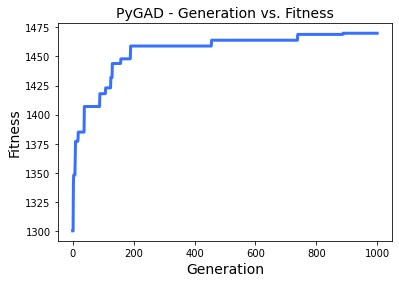

In [32]:
p = ga_instance.plot_fitness()